# EPILEPTIC SEIZURE PROJECT 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Loading data

In [105]:
epi=pd.read_csv(r'data.csv')

# Taking a look at data

In [106]:
epi.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# Statistics

In [107]:
epi.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


# Descriptive Data Analytics

In [108]:
# droping the Unnamed:0 column
epi.drop('Unnamed: 0',axis=1,inplace=True)

In [109]:
print(epi.shape)

(11500, 179)


In [110]:
# Finding not null values
epi.isnull().values.any()

False

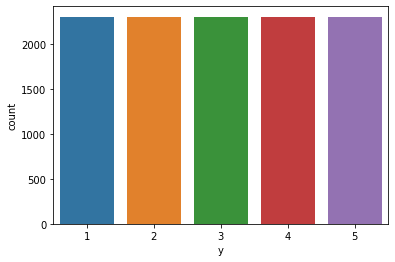

In [111]:
ax = sns.countplot(x= epi['y'], data=epi,label = "Count")

In [112]:
#Feature set
X = epi.iloc[:,1:179].values
X.shape

(11500, 178)

Text(0.5, 0, 'Samples')

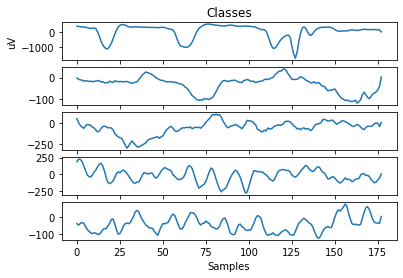

In [113]:
#plotting the first record of each category
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')

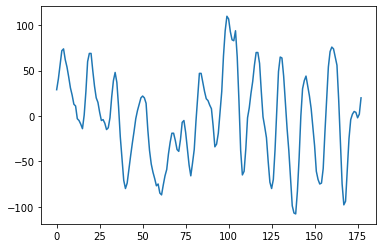

In [114]:
# plotting an epileptic wave form 
plt.plot(range(178), epi.iloc[11499,0:178])
plt.show()

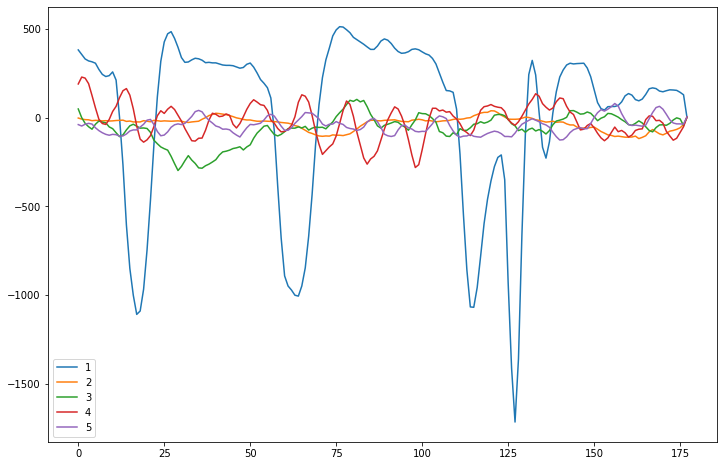

In [115]:
#plotting the first record of each category
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

# Training

In [116]:
X = epi.drop('y',axis=1)
y = epi['y']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Decision Tree

In [118]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train,y_train)
pred_t=Dt.predict(X_test)

In [119]:
print("Accuracy score for Decision tree: ",accuracy_score(y_test,pred_t))

Accuracy score for Decision tree:  0.46550724637681157


# SVM

In [120]:
svc = svm.SVC()
svc.fit(X_train,y_train)
pred_s=svc.predict(X_test)

In [121]:
print("Accuracy score for SVM: ",accuracy_score(y_test,pred_s))

Accuracy score for SVM:  0.1907246376811594


# Random Forest

In [122]:
rf=RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)
pre_r=rf.predict(X_test)

In [123]:
print("Accuracy score for Random Forest: ",accuracy_score(y_test,pre_r))

Accuracy score for Random Forest:  0.6730434782608695


# Standardization

In [124]:
J=StandardScaler().fit_transform(X)
pd_std=pd.DataFrame(data=J)
pd_std

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.885051,1.209929,1.462764,1.439539,1.242366,0.818262,0.380910,-0.014267,-0.163196,-0.198415,...,0.105907,-0.041630,-0.020282,-0.107131,-0.375743,-0.535944,-0.693858,-0.634144,-0.433290,-0.235399
1,2.400577,2.366190,2.239441,2.109257,2.037441,1.996033,1.941660,1.719102,1.546403,1.484569,...,1.074264,1.057700,0.972841,0.943023,0.982911,1.018615,1.029295,1.023429,0.954241,0.856537
2,-0.123287,-0.169154,-0.225131,-0.172743,-0.149016,-0.179743,-0.312756,-0.409056,-0.484131,-0.547478,...,0.233004,0.407820,0.455214,0.361582,0.193824,0.008151,-0.103237,-0.136872,-0.138593,-0.144405
3,-0.564057,-0.542530,-0.524794,-0.513803,-0.503073,-0.545472,-0.591462,-0.575607,-0.496475,-0.453979,...,-0.426689,-0.436417,-0.417531,-0.397851,-0.375743,-0.428321,-0.389414,-0.364021,-0.347337,-0.320328
4,0.015586,-0.325731,-0.537025,-0.575814,-0.434746,-0.254129,-0.058825,0.041250,-0.089134,-0.329314,...,0.118012,0.085916,0.082040,0.005598,-0.108758,-0.165242,-0.316347,-0.431551,-0.470127,-0.368858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-0.062907,-0.066777,-0.078358,-0.104531,-0.173862,-0.216936,-0.238435,-0.217830,-0.237258,-0.266981,...,0.178534,0.152726,0.166305,0.147991,0.110762,0.073921,-0.030170,-0.149150,-0.212268,-0.217200
11496,-0.213856,-0.000533,0.233536,0.534181,0.925578,1.351359,1.563860,1.521707,1.231639,0.886175,...,-0.511420,-0.333165,-0.128622,0.035263,0.164159,0.241335,0.371696,0.550714,0.794613,1.105255
11497,0.154459,0.101845,-0.017202,-0.042521,0.111868,0.204582,0.207494,-0.014267,0.065162,0.125715,...,-0.196704,-0.333165,-0.218906,-0.285123,-0.286748,-0.320698,-0.103237,0.065721,0.070150,0.025452
11498,-0.171590,-0.084843,0.007260,-0.017716,0.037330,0.117799,0.083625,0.158453,0.176255,0.219214,...,0.747443,0.796533,0.882557,0.954889,0.929514,0.773473,0.603073,0.495462,0.438521,0.407630


# Feature extraction using PCA

In [22]:
mean_k=np.mean(J,axis=0)
matrix=(J-mean_k).T.dot((J-mean_k))/(J.shape[0]-1)
covariance = np.cov(J,rowvar=False)

# Finding Eigen values

In [23]:
covariance=np.cov(J.T)
eigen_values,eigen_vectors=np.linalg.eig(covariance)
# print(eigen_vectors)
# print(eigen_values)

# Eigen Verification

In [24]:
sq = [] 
for i in eigen_vectors: 
    sq.append(i**2)
print(sq)
sum(sq)
for ev in eigen_vectors:
    np.testing.assert_array_almost_equal(1.0)
    np.linalg.norm(ev)

[array([1.94658603e-06, 9.21399805e-04, 2.00285903e-04, 1.78858227e-03,
       8.15737819e-04, 5.95764738e-03, 4.93224020e-05, 3.07082699e-04,
       6.54959565e-03, 7.99746901e-04, 5.76423288e-03, 1.15346021e-03,
       2.79950191e-02, 7.11390480e-03, 3.63651283e-04, 1.45089041e-03,
       4.27490203e-04, 1.19131095e-02, 5.23873739e-04, 1.95376459e-03,
       1.91371564e-03, 8.73939761e-03, 1.42581601e-03, 8.61704584e-03,
       1.63910599e-02, 9.11157694e-03, 9.92684174e-03, 3.52838371e-03,
       2.21855839e-03, 7.89169721e-04, 4.08979096e-04, 1.42526242e-02,
       4.71988833e-03, 3.70582748e-02, 1.77917406e-03, 4.33677599e-03,
       8.80552815e-02, 5.45069577e-03, 3.81607977e-03, 2.37756931e-02,
       9.10191587e-04, 2.95037138e-02, 8.39165726e-03, 3.61072090e-02,
       5.70211660e-03, 6.80370107e-04, 1.57559263e-02, 6.96823439e-03,
       2.03227316e-04, 6.82932168e-02, 1.77314934e-02, 1.75821425e-02,
       1.81625158e-02, 1.41123376e-02, 2.31496908e-04, 6.44639254e-02,
     

TypeError: assert_array_almost_equal() missing 1 required positional argument: 'y'

# Sorting eigen vectors

In [25]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i])
for i in range(len(eigen_values))]
print(type(eigen_pairs))
eigen_pairs.sort()
eigen_pairs.reverse()
print("\n",eigen_pairs)
eigenvalues
print('\n\n\nEigenvalues')
for i in eigen_pairs:
    print(i[0])


<class 'list'>

 [(9.983823298801221, array([ 0.0013952 ,  0.00837304,  0.01641921,  0.02471636,  0.03266774,
        0.04078981,  0.0473538 ,  0.05233473,  0.05441134,  0.05386018,
        0.04881035,  0.03915523,  0.0266285 ,  0.01303562, -0.00057015,
       -0.01577452, -0.03199866, -0.04698791, -0.05861797, -0.06703524,
       -0.07427748, -0.0795465 , -0.08460713, -0.08954579, -0.09286568,
       -0.09418191, -0.09072352, -0.08046098, -0.06599533, -0.04756052,
       -0.02719397, -0.00604662,  0.01614726,  0.03822122,  0.05984706,
        0.07866066,  0.09216447,  0.10136467,  0.10978308,  0.11726958,
        0.12284254,  0.12410042,  0.11913785,  0.10785407,  0.09287568,
        0.07475404,  0.05389309,  0.03248877,  0.00919173, -0.0163963 ,
       -0.04353296, -0.06955302, -0.0876024 , -0.09937147, -0.10574723,
       -0.10971443, -0.1105692 , -0.10540896, -0.09355081, -0.07855625,
       -0.06195608, -0.04425906, -0.02205726,  0.00213099,  0.02616303,
        0.04788982,  0.067

NameError: name 'eigenvalues' is not defined

# Finding number of significant components(ones with higher % of variance)

In [26]:
total=sum(eigen_values)
# print("\n",total)
exp_variance=[(i/total)*100 for i in sorted(eigen_values,reverse=True)]
# print("\n\n1. Explained variance\n",exp_variance)
cum_exp_var=np.cumsum(exp_variance)
# print("\n\n2. Cumulative explained variance\n",cum_exp_var)
print("\n\n3. % of variance of first comp.\n",exp_variance[0:35])
print("\n\n4. Sum of %\n",sum(exp_variance[0:35]))



3. % of variance of first comp.
 [5.6084017641873585, 5.239615010731637, 4.964632615471146, 4.825961388263284, 4.405242465206229, 4.146817679054669, 4.054660191752517, 3.8976305110034666, 3.6634490628077208, 3.406158477664751, 3.304099838915453, 3.2834418302456467, 2.956710596902328, 2.9320374672476377, 2.559290274914826, 2.356218040933574, 2.1357573236773844, 2.0770006859422487, 2.0138413959006938, 1.9648174686823074, 1.9226717259664758, 1.8155833833786983, 1.775827952938511, 1.7240309888448626, 1.6271511300981563, 1.6238082505059943, 1.5178972995288496, 1.4724812381133288, 1.440636775655165, 1.3862353830749974, 1.3580895869723293, 1.304005252016682, 1.2543066250516441, 1.1426186527765227, 1.0924193705327006]


4. Sum of %
 92.2535477049598


In [27]:
pca=PCA(n_components=3)

In [28]:
pca.fit(pd_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca_feat=pca.transform(pd_std)

In [30]:
print(pca_feat.shape)

(11500, 3)


In [31]:
pca_df=pd.DataFrame(data=pca_feat, columns = ['PC1','PC2','PC3'])
pca_df.head()

,PC1,PC2,PC3
0,-0.160488,-1.063044,0.839449
1,-1.710107,-3.873245,6.300734
2,0.496530,-0.242236,0.921891
3,-0.182042,0.330284,-0.105539
4,-0.238554,0.121339,0.485640


In [32]:
x=pca_df.iloc[:,0:3]
y=epi.iloc[:,178:179]

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

# SVM

In [34]:
SVM=svm.SVC(kernel='rbf',gamma='auto',class_weight='balanced')
SVM.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
pred_svm=SVM.predict(x_test)

In [36]:
print(pred_svm[0:5])
print(y_test[0:5])

[1 5 4 5 5]
      y
3176  1
6551  4
7726  4
2488  2
854   3


In [37]:
print("Accuracy: SVM",accuracy_score(y_test,pred_svm))

Accuracy: SVM 0.4391304347826087


In [38]:
print("Classification report for SVM\n",classification_report(y_test,pred_svm))

Classification report for SVM
               precision    recall  f1-score   support

           1       0.90      0.91      0.90       460
           2       0.44      0.17      0.25       460
           3       0.30      0.11      0.16       460
           4       0.29      0.19      0.23       460
           5       0.32      0.82      0.45       460

    accuracy                           0.44      2300
   macro avg       0.45      0.44      0.40      2300
weighted avg       0.45      0.44      0.40      2300



In [39]:
print("Confusion matrix for SVM\n",confusion_matrix(y_test,pred_svm))


Confusion matrix for SVM
 [[418  15   7  11   9]
 [ 35  80  36  69 240]
 [ 10  39  49  87 275]
 [  3  35  43  88 291]
 [  0  13  27  45 375]]


# Decision Tree

In [40]:
Tree=DecisionTreeClassifier(criterion='gini',min_samples_leaf=10)
Tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
Tree_pred=Tree.predict(x_test)

In [42]:
print(Tree_pred[0:5])
print(y_test[0:5])

[1 3 4 3 2]
      y
3176  1
6551  4
7726  4
2488  2
854   3


In [43]:
print("Accuracy: Decision Tree:",accuracy_score(y_test,Tree_pred))

Accuracy: Decision Tree: 0.3839130434782609


In [44]:
print("Confusion matrix for Decision Tree\n",confusion_matrix(y_test,Tree_pred))

Confusion matrix for Decision Tree
 [[405  28   9  15   3]
 [ 34 110 109 111  96]
 [ 16 101 115 114 114]
 [  6 107 118 113 116]
 [  1 121  90 108 140]]


In [45]:
print("Classification report for Decision Tree\n",classification_report(y_test,Tree_pred))

Classification report for Decision Tree
               precision    recall  f1-score   support

           1       0.88      0.88      0.88       460
           2       0.24      0.24      0.24       460
           3       0.26      0.25      0.26       460
           4       0.25      0.25      0.25       460
           5       0.30      0.30      0.30       460

    accuracy                           0.38      2300
   macro avg       0.38      0.38      0.38      2300
weighted avg       0.38      0.38      0.38      2300



# Random Forest

In [46]:
Random_f=RandomForestClassifier(n_estimators=35)
Random_f.fit(x_train,y_train)
pred_rf=Random_f.predict(x_test)

In [47]:
print(pred_rf[0:5])
print(y_test[0:5])

[1 3 4 3 2]
      y
3176  1
6551  4
7726  4
2488  2
854   3


In [48]:
print("Acuracy: Random Forest",accuracy_score(y_test,pred_rf))

Acuracy: Random Forest 0.3934782608695652


In [49]:
print("Confusion_matrix for Random Forest\n",confusion_matrix(y_test,pred_rf))

Confusion_matrix for Random Forest
 [[415  22   7  11   5]
 [ 41 119  89 102 109]
 [ 15 109 104 128 104]
 [  4 104 123 111 118]
 [  1  94  96 113 156]]


In [50]:
print("Classification Report for Random Forest\n",classification_report(y_test,pred_rf))

Classification Report for Random Forest
               precision    recall  f1-score   support

           1       0.87      0.90      0.89       460
           2       0.27      0.26      0.26       460
           3       0.25      0.23      0.24       460
           4       0.24      0.24      0.24       460
           5       0.32      0.34      0.33       460

    accuracy                           0.39      2300
   macro avg       0.39      0.39      0.39      2300
weighted avg       0.39      0.39      0.39      2300



# Checking data linearity

In [51]:
Xl=pd_std.iloc[:,0:178]
Yl=epi.iloc[:,178:179]

In [52]:
reg=LinearRegression().fit(Xl,Yl)

In [53]:
print("Non-linearity: ",r2_score(reg.predict(Xl),Yl)) # data is non-linear

Non-linearity:  -26.50982677051373


# Extracting features through kernel PCA

In [54]:
ker_pca=KernelPCA(n_components=35,kernel='linear')
kp=ker_pca.fit_transform(J)
kp.shape

(11500, 35)

In [55]:
ker_pca_df=pd.DataFrame(data=kp,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35'])

In [56]:
y=epi.iloc[:,178:179]
y_pd=pd.DataFrame(data=y)
ker_pca_df["result"]=y_pd["y"]

In [57]:
x=ker_pca_df.iloc[:,0:35]
y=ker_pca_df.iloc[:,35:36]

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

# Random Forest

In [59]:
Random=RandomForestClassifier(n_estimators=60)
Random.fit(x_train,y_train)
kp_pred=Random.predict(x_test)

In [60]:
print(kp_pred[0:5])
print(y_test[0:5])

[1 5 4 2 3]
      result
3176       1
6551       4
7726       4
2488       2
854        3


Text(0, 0.5, 'Predicted values')

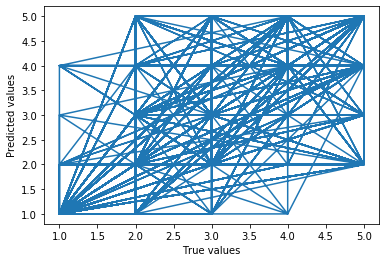

In [61]:
plt.plot(y_test,kp_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [62]:
print("Accuracy: Random forest",accuracy_score(y_test,kp_pred))

Accuracy: Random forest 0.7078260869565217


In [63]:
print("Cross-Validation score: Random forest",cross_val_score(Random,x,y,cv=10).mean())

Cross-Validation score: Random forest 0.7097391304347827


In [64]:
print("Confusion matrix for Random Forest\n",confusion_matrix(y_test,kp_pred))

Confusion matrix for Random Forest
 [[446   6   2   6   0]
 [ 30 253 120  25  32]
 [ 12 111 260  31  46]
 [  3   9   4 363  81]
 [  0  30  37  87 306]]


In [65]:
print("Classification report for Random Forest\n",classification_report(y_test,kp_pred))

Classification report for Random Forest
               precision    recall  f1-score   support

           1       0.91      0.97      0.94       460
           2       0.62      0.55      0.58       460
           3       0.61      0.57      0.59       460
           4       0.71      0.79      0.75       460
           5       0.66      0.67      0.66       460

    accuracy                           0.71      2300
   macro avg       0.70      0.71      0.70      2300
weighted avg       0.70      0.71      0.70      2300



# Decision Tree

In [66]:
D_Tree=DecisionTreeClassifier(criterion='gini',min_samples_leaf=10)
D_Tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
Tree_predicted=D_Tree.predict(x_test)

In [68]:
print(Tree_predicted[0:5])
print(y_test[0:5])

[1 4 5 4 2]
      result
3176       1
6551       4
7726       4
2488       2
854        3


Text(0, 0.5, 'Predicted values')

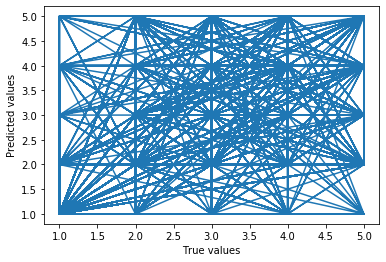

In [69]:
plt.plot(y_test,Tree_predicted)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [70]:
print("Accuracy: Decision Tree",accuracy_score(y_test,Tree_predicted))

Accuracy: Decision Tree 0.5304347826086957


In [71]:
print("Cross validation score: Decision Tree",cross_val_score(D_Tree,x,y,cv=10).mean())

Cross validation score: Decision Tree 0.5362608695652173


In [72]:
print("Confusion matrix for Decision Tree\n",confusion_matrix(y_test,Tree_predicted))

Confusion matrix for Decision Tree
 [[394  31  11  17   7]
 [ 26 176 135  45  78]
 [ 16 135 190  34  85]
 [ 22  43  29 271  95]
 [  7  81  75 108 189]]


In [73]:
print("Classification report for Decision Tree\n",classification_report(y_test,Tree_predicted))

Classification report for Decision Tree
               precision    recall  f1-score   support

           1       0.85      0.86      0.85       460
           2       0.38      0.38      0.38       460
           3       0.43      0.41      0.42       460
           4       0.57      0.59      0.58       460
           5       0.42      0.41      0.41       460

    accuracy                           0.53      2300
   macro avg       0.53      0.53      0.53      2300
weighted avg       0.53      0.53      0.53      2300



# SVM

In [74]:
SV=svm.SVC(kernel='rbf',gamma='auto',class_weight='balanced')
SV.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
y_pred=SV.predict(x_test)

In [76]:
print(y_pred[0:5])
print(y_test[0:5])

[1 5 5 2 5]
      result
3176       1
6551       4
7726       4
2488       2
854        3


Text(0, 0.5, 'Predicted values')

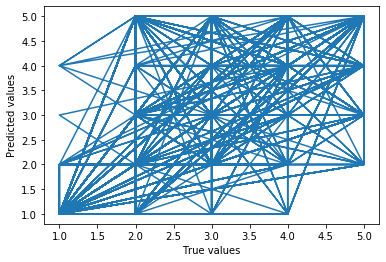

In [77]:
plt.plot(y_test,y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")

In [78]:
print("Accuracy:SVM",accuracy_score(y_test,y_pred))

Accuracy:SVM 0.6469565217391304


In [79]:
print("Cross validation score: SVM",cross_val_score(SV,x,y,cv=10).mean())

Cross validation score: SVM 0.6487826086956521


In [80]:
print("Confusion matrix for SVM\n",confusion_matrix(y_test,y_pred))

Confusion matrix for SVM
 [[449   7   1   3   0]
 [ 33 146 107  10 164]
 [  7  65 197  12 179]
 [  7  18  11 303 121]
 [  0  10  30  27 393]]


In [81]:
print("Classification report for SVM\n",classification_report(y_test,y_pred))

Classification report for SVM
               precision    recall  f1-score   support

           1       0.91      0.98      0.94       460
           2       0.59      0.32      0.41       460
           3       0.57      0.43      0.49       460
           4       0.85      0.66      0.74       460
           5       0.46      0.85      0.60       460

    accuracy                           0.65      2300
   macro avg       0.68      0.65      0.64      2300
weighted avg       0.68      0.65      0.64      2300



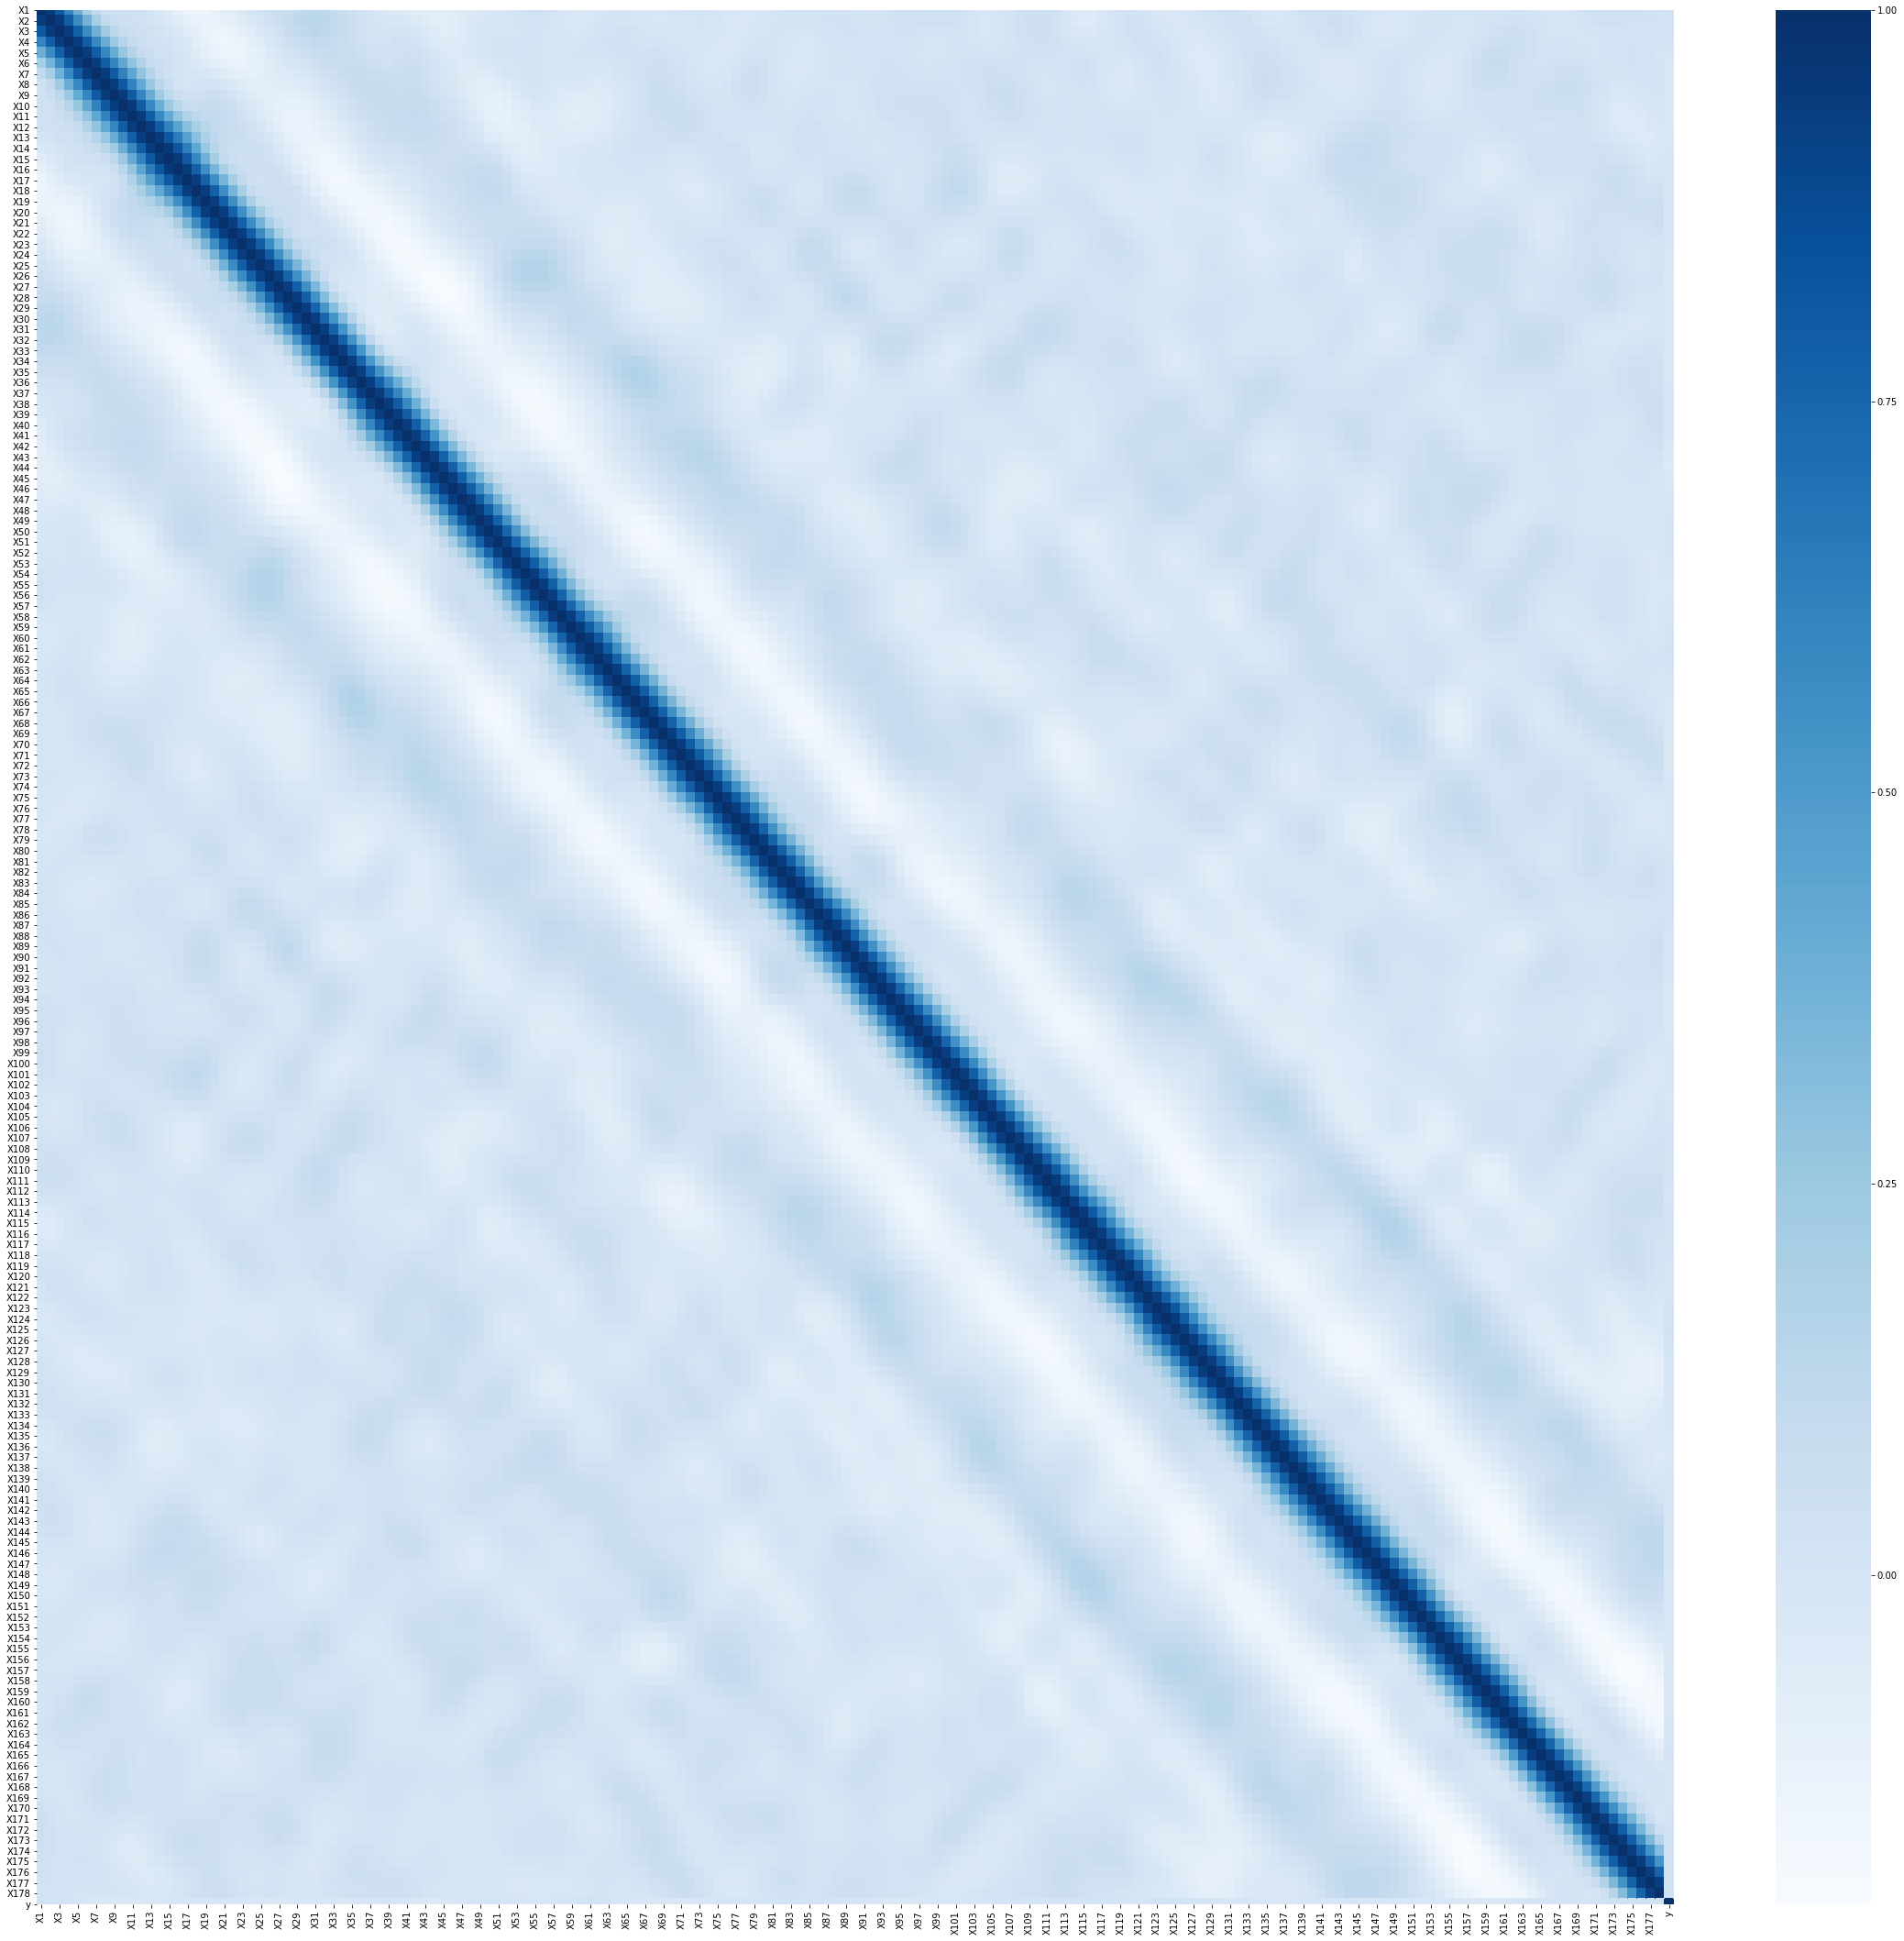

In [103]:
plt.figure(figsize=(40,38))
Corr=epi[epi.columns].corr()
sns.heatmap(Corr,cmap="Blues")